In [283]:
import pandas as pd
import matplotlib.pyplot as plt

In [284]:
tableSalary = pd.read_csv('salary.csv', sep='|')

In [285]:
tableSalary.head(5)

,id,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary
0,1,Facility Maintenance & Smart Warehouse Manager,Bandung,IDR,Manajer/Asisten Manajer,5 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Manufaktur,Pemeliharaan",NaN,NaN,NaN,NaN,Deskripsi PekerjaanRequirements :D3/SI from re...,NaN
1,2,Procurement Department Head,Jakarta Raya,IDR,Manajer/Asisten Manajer,5 tahun,"Sarjana (S1), Diploma Pascasarjana, Gelar Prof...",Penuh Waktu,"Manufaktur,Pembelian/Manajemen Material",NaN,25 days,51 - 200 pekerja,Manajemen/Konsulting HR,Job Role: 1. Responsible for material availabi...,NaN
2,3,SALES ADMIN,Jakarta Barat,IDR,Supervisor/Koordinator,4 tahun,Sarjana (S1),Penuh Waktu,"Penjualan / Pemasaran,Penjualan Ritel","Waktu regular, Senin - Jumat;Bisnis (contoh: K...",30 days,51 - 200 pekerja,Umum & Grosir,Internal Sales & AdminJob Description :We are ...,NaN
3,4,City Operation Lead Shopee Express (Cirebon),Cirebon,IDR,Supervisor/Koordinator,5 tahun,"Sarjana (S1), Diploma Pascasarjana, Gelar Prof...",Penuh Waktu,"Pelayanan,Logistik/Rantai Pasokan","Tip;Waktu regular, Senin - Jumat;Kasual (conto...",21 days,2001 - 5000 pekerja,Retail/Merchandise,Job Description:Responsible for HSE implementa...,NaN
4,5,Japanese Interpreter,Bekasi,IDR,Pegawai (non-manajemen & non-supervisor),2 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Lainnya,Jurnalis/Editor",NaN,23 days,201 - 500 pekerja,Manajemen/Konsulting HR,Overview: Our clients is manufacture for autom...,NaN


In [286]:
tableSalary.shape

(34746, 15)

In [287]:
tableSalary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34746 entries, 0 to 34745
Data columns (total 15 columns):
id                      34746 non-null int64
job_title               34746 non-null object
location                34746 non-null object
salary_currency         34742 non-null object
career_level            34746 non-null object
experience_level        30205 non-null object
education_level         34746 non-null object
employment_type         33402 non-null object
job_function            34746 non-null object
job_benefits            27330 non-null object
company_process_time    24555 non-null object
company_size            29103 non-null object
company_industry        33132 non-null object
job_description         34745 non-null object
salary                  9352 non-null float64
dtypes: float64(1), int64(1), object(13)
memory usage: 4.0+ MB


In [288]:
# Type of Jobs (visualization data)

In [292]:
# Top 10 Region (highest average salary)
topRegion = tableSalary.loc[:, ['location', 'salary']]
topRegion.sort_values("location", inplace=True)
topRegion.dropna(inplace=True)

topRegion.groupby("location")["salary"].mean().round(0)

location
Aceh                  9482229.0
Ambon                 4400000.0
Badung                6224430.0
Bali                  8902414.0
Balikpapan            6835390.0
Bandar Lampung        4463458.0
Bandung               5548845.0
Bangka                6416667.0
Bangka Belitung       8483333.0
Banjar               11250000.0
Banjarbaru            4100000.0
Banjarmasin           5440250.0
Banjarnegara          3383333.0
Banten                6262354.0
Bantul                3534250.0
Banyuwangi            3166667.0
Batam                 7854730.0
Batu                  3110000.0
Bekasi                6300290.0
Belitung              3250000.0
Bengkulu              4159801.0
Bima                  4600000.0
Binjai                6530000.0
Bintan                5283333.0
Bitung                2250000.0
Blitar                3716667.0
Bogor                 5512379.0
Bontang               8000000.0
Brebes                3533333.0
Bukittinggi           5291667.0
                        ...    

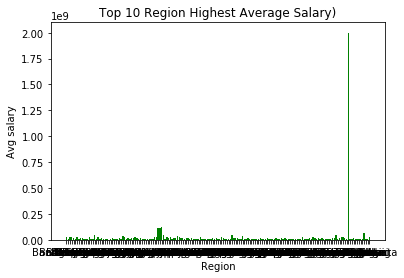

In [290]:
xRegion = list(topRegion.iloc[:, 0])
yRegion = list(topRegion.iloc[:, 1])
  
plt.bar(xRegion, yRegion, color='g')
plt.title("Top 10 Region Highest Average Salary)")
plt.xlabel("Region")
plt.ylabel("Avg salary")
  
plt.show()